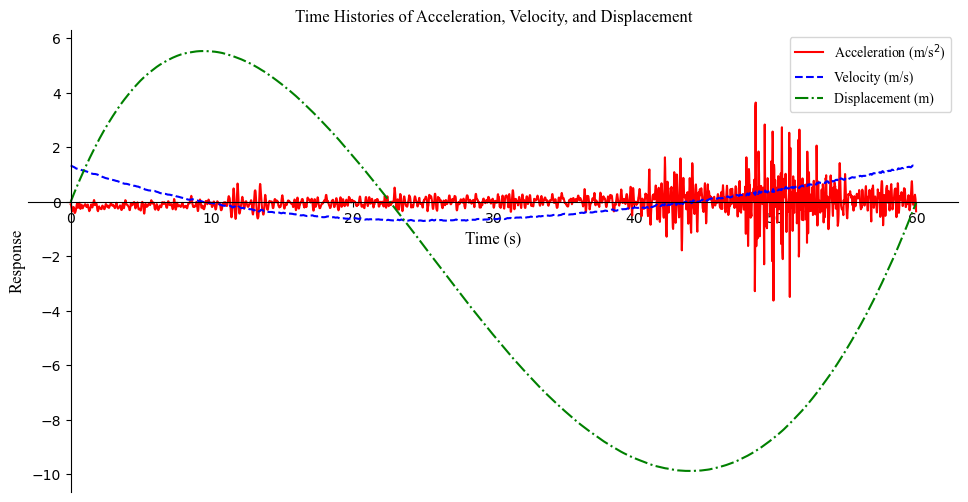

处理已完成。


In [26]:
import numpy as np
from scipy.integrate import cumtrapz
from scipy.signal import butter, filtfilt
import matplotlib.pyplot as plt

# 读取加速度时程数据
def read_acceleration(file_name):
    data = np.loadtxt(file_name)
    time = data[:, 0]
    acceleration = data[:, 1]
    return time, acceleration

# 去除直流分量且均值归零
def removedc_justify(DataIn):
    Dm=DataIn - np.mean(DataIn);
    return Dm-np.mean(Dm)

# 带宽滤波
def bandpass_filter(acceleration, lowcut, highcut, fs, order=4):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    filtered_acceleration = filtfilt(b, a, acceleration)
    return filtered_acceleration

# 积分
def integrate(DataIn, time):
    # 使用累积梯形积分法
    DataOut = cumtrapz(DataIn, time, initial=0)
    return DataOut
    
#-------------------------主程序开始-------------------------------
# 设置滤波参数
fs = 50  # 采样频率，假设为1000Hz
dt = 1/fs  # 时间间隔
lowcut = 0.1  # 带通滤波器的低频截止频率
highcut =20  # 带通滤波器的高频截止频率

# 读取数据（txt文件中，每一行包含一个时间戳和对应的加速度值并以空格分隔）
time, acceleration = read_acceleration('C:/Users/pc/Desktop/2.txt')
# 去除直流分量且均值归零
acceleration = removedc_justify(acceleration)
# 带宽滤波
#acceleration = bandpass_filter(acceleration, lowcut, highcut, fs)
# 积分计算速度
velocity = integrate(acceleration, time)

# 去除直流分量且均值归零
velocity = removedc_justify(velocity)
# 计算位移
displacement = integrate(velocity, time)

# 记录速度和位移
np.savetxt('velocity.txt', np.vstack((time, velocity)).T, fmt='%f')
np.savetxt('displacement.txt', np.vstack((time, displacement)).T, fmt='%f')

# 绘制加速度、速度和位移时程曲线
time = np.arange(0, len(acceleration) * dt, dt)  # 创建时间数组
plt.figure(figsize=(12, 6))
plt.plot(time, acceleration, label='Acceleration (m/s$^2$)', linestyle='-', color='r')
plt.plot(time, velocity, label='Velocity (m/s)', linestyle='--', color='b')
plt.plot(time, displacement, label='Displacement (m)', linestyle='-.', color='g')
plt.title('Time Histories of Acceleration, Velocity, and Displacement',font='times new roman',fontsize=12)
plt.xlabel('Time (s)',font='times new roman',fontsize=12)
plt.xticks(font='times new roman',fontsize=12)
plt.ylabel('Response',font='times new roman',fontsize=12)
plt.yticks(font='times new roman',fontsize=12)
plt.legend(loc='best',prop='times new roman',fontsize=12)
plt.gca().spines["right"].set_color("none")
plt.gca().spines["top"].set_color("none")
plt.gca().spines["bottom"].set_position(("data", 0))
plt.gca().spines["left"].set_position(("data", 0))
#plt.grid(True)
plt.savefig('C:/Users/pc/Desktop/2.jpeg', dpi=300)
plt.show()
print("处理已完成。")